## Create Fake Dataset / Import Dataset

In [1]:
from PIL import Image
path = "/shared/demo/demo_images/cat.jpg"
image = Image.open(path)
print(type(image))


<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [2]:
from skimage import io
image2 = io.imread(path)
print(type(image2))

<class 'numpy.ndarray'>


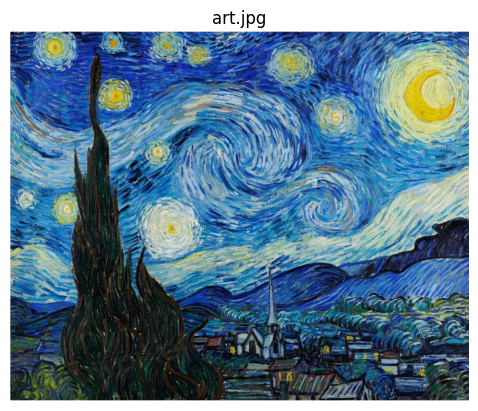

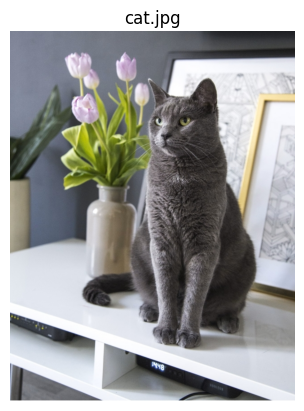

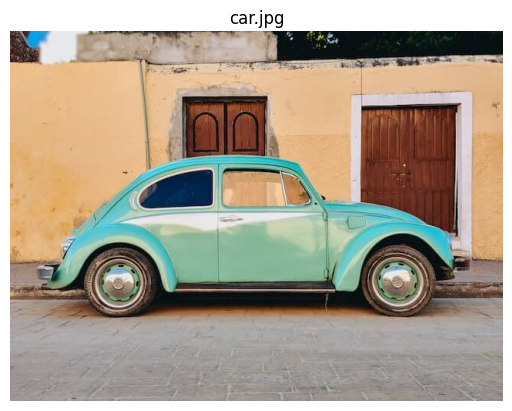

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Specify the folder containing images
folder_path = "/shared/demo/demo_images"

# Get a list of image file paths
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Display images
for image_file in image_files:
    img = mpimg.imread(image_file)
    plt.figure()
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(os.path.basename(image_file))  # Show filename as title
plt.show()


In [4]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', None)

# Create a NumPy array
data = np.array([
    [1, "/shared/demo/demo_images/cat.jpg", "A gray cat sits elegantly on a white desk, surrounded by home decor, including a vase of pink tulips and framed artwork in the background."],
    [2, "/shared/demo/demo_images/car.jpg", "A vintage turquoise Volkswagen Beetle is parked on a cobblestone street in front of a yellow building with two wooden doors."],
    [3, "/shared/demo/demo_images/art.jpg", "A vibrant painting depicting a swirling night sky filled with stars and a crescent moon, overlooking a small village and dark cypress trees in the foreground."],
])

# Specify column names
columns = ["img_id", "img_url", "reference_caption"]

# Convert NumPy array to DataFrame
df = pd.DataFrame(data, columns=columns)
df['reference_caption'] = df['reference_caption'].apply(lambda x: [x])  # Convert caption to a list


df

# 参考格式
# [
#     {
#         id:xxx
#         url:xx
#         captions: ['aaa', 'bbb']
#     }
    
    
# ]

,img_id,img_url,reference_caption
0,1,/shared/demo/demo_images/cat.jpg,"[A gray cat sits elegantly on a white desk, surrounded by home decor, including a vase of pink tulips and framed artwork in the background.]"
1,2,/shared/demo/demo_images/car.jpg,[A vintage turquoise Volkswagen Beetle is parked on a cobblestone street in front of a yellow building with two wooden doors.]
2,3,/shared/demo/demo_images/art.jpg,"[A vibrant painting depicting a swirling night sky filled with stars and a crescent moon, overlooking a small village and dark cypress trees in the foreground.]"


## Generate Multiple Choice Question

In [5]:
# Generate random choice in [A, B, C, D]
import random

def generate_random_choice():
    return random.choice(['A', 'B', 'C', 'D'])

In [6]:
df['multiple_choice_solution'] = df.apply(lambda x: generate_random_choice(), axis=1)

In [7]:
df.head(1)

,img_id,img_url,reference_caption,multiple_choice_solution
0,1,/shared/demo/demo_images/cat.jpg,"[A gray cat sits elegantly on a white desk, surrounded by home decor, including a vase of pink tulips and framed artwork in the background.]",B


In [ ]:
# Generate multiple choice questions

In [ ]:
# import os
# print(os.getenv("OPENAI_API_KEY"))

In [8]:
import os
from openai import OpenAI
client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),  
)


def generate_multiple_choice_question(reference_caption, correct_choice, level='medium'): 
    # Define the prompt to generate inferior choices
    if level == 'easy':
        level_message = "The distractors are obviously incorrect but still loosely related to the context."
    elif level == 'medium':
        level_message = "The distractors are somewhat related to the context but contain inaccuracies or non-fluent language."
    elif level == 'hard':
        level_message = "The distractors are closely related to the context but may confuse someone without careful observation."


    prompt = f"""
    Given the ground truth caption below:
    "{reference_caption}"
    Generate three plausible but incorrect distractors.
    "{level_message}"
    Format the result as a multiple-choice question. 
    Question title should be "Which of the following captions best describes the painting?".
    The correct choice should be placed at choice "{correct_choice}". 
    Do not generate special symbols such as '*'.
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt},
        ],
        temperature=0.7,
        max_tokens=200,
    )

    # Extract the generated multiple-choice question
    question = response.choices[0].message.content    
    
    return question

In [9]:
# generate easy question
df['multiple_choice_question_easy'] = df.apply(lambda x: generate_multiple_choice_question(x['reference_caption'][0], x['multiple_choice_solution'], level='easy'), axis=1)

In [10]:
# generate medium question
df['multiple_choice_question_medium'] = df.apply(lambda x: generate_multiple_choice_question(x['reference_caption'][0], x['multiple_choice_solution'], level='medium'), axis=1)

In [11]:
# generate hard question 
df['multiple_choice_question_hard'] = df.apply(lambda x: generate_multiple_choice_question(x['reference_caption'][0], x['multiple_choice_solution'], level='hard'), axis=1)

In [12]:
df.head(1)

,img_id,img_url,reference_caption,multiple_choice_solution,multiple_choice_question_easy,multiple_choice_question_medium,multiple_choice_question_hard
0,1,/shared/demo/demo_images/cat.jpg,"[A gray cat sits elegantly on a white desk, surrounded by home decor, including a vase of pink tulips and framed artwork in the background.]",C,"Which of the following captions best describes the painting?\n\nA. A gray cat lounges on a black sofa, next to a bowl of fruit and a stack of books.\n\nB. A gray cat stretches on a white carpet, with a wooden shelf full of plants in the background.\n\nC. A gray cat sits elegantly on a white desk, surrounded by home decor, including a vase of pink tulips and framed artwork in the background.\n\nD. A gray cat perches on a windowsill, overlooking a bustling cityscape with a skyline view.","Which of the following captions best describes the painting?\n\nA. A black dog lies lazily on a brown table, near office supplies, including a pot of yellow daisies and a stack of books on a shelf.\n\nB. A small bird perches awkwardly on a green chair, amidst garden tools, with a basket of red roses and a clock hanging on the wall.\n\nC. A gray cat sits elegantly on a white desk, surrounded by home decor, including a vase of pink tulips and framed artwork in the background.\n\nD. A large fish swims beneath a glass coffee table, accompanied by kitchen utensils, with a bouquet of blue lilies and a painting of a landscape.","Which of the following captions best describes the painting?\n\nA. A gray cat lounges on a white couch, surrounded by colorful pillows and a coffee table with a vase of red roses.\n\nB. A gray cat naps peacefully on a wooden floor, with a plush rug and a bookshelf filled with novels in the background.\n\nC. A gray cat sits elegantly on a white desk, surrounded by home decor, including a vase of pink tulips and framed artwork in the background.\n\nD. A gray cat perches on a sunny windowsill, with potted plants and a cityscape visible through the glass."


In [ ]:
# # Save the annotation with multiple choice question to output file

# # Convert DataFrame to a list of dictionaries
# list_of_dicts = df.to_dict(orient="records")

# # Save the list of dictionaries to a JSON file
# output_file = "output_file_name.json"
# with open(output_file, "w") as file:
#     json.dump(list_of_dicts, file, indent=4)

# print(f"DataFrame saved as a list of dictionaries in {output_file}")

## Perform Multiple Choice Selection

### Use llava model

In [15]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests 

In [16]:
# Load model from local directory 
model_path = '/shared/model/llava-v1.6-mistral-7b-hf'

processor = LlavaNextProcessor.from_pretrained(model_path)

model = LlavaNextForConditionalGeneration.from_pretrained(model_path, torch_dtype=torch.float16, low_cpu_mem_usage=True, load_in_4bit=True) 
#model.to("cuda:0")

Some kwargs in processor config are unused and will not have any effect: num_additional_image_tokens. 
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
# helper function: 
def perform_multiple_choice_task_llava(img_url, question):
    image = Image.open(img_url)
    
    conversation = [
        {

          "role": "user",
          "content": [
              {"type": "text", "text": question + "\nOnly return the correct choice with a single letter."},
              {"type": "image"},
            ],
        },
    ]
    prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

    inputs = processor(images=image, text=prompt, return_tensors="pt").to("cuda:0")

    # autoregressively complete prompt
    output = model.generate(**inputs, max_new_tokens=150)
    output = processor.decode(output[0], skip_special_tokens=True)

    # mcq_question = output.split('[/INST]')[0].split('[INST] ')[1].strip()
    mcq_answer = output.split('[/INST]')[1].strip()
    return mcq_answer

In [18]:
df['multiple_choice_prediction_easy'] = df.apply(lambda x: perform_multiple_choice_task_llava(x['img_url'], x['multiple_choice_question_easy']), axis=1)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
/opt/conda/lib/python3.10/site-packages/bitsandbytes/nn/modules.py:452: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(
Expanding inputs for image tokens in LLaVa-NeXT should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [19]:
df['multiple_choice_prediction_medium'] = df.apply(lambda x: perform_multiple_choice_task_llava(x['img_url'], x['multiple_choice_question_medium']), axis=1)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [20]:
df['multiple_choice_prediction_hard'] = df.apply(lambda x: perform_multiple_choice_task_llava(x['img_url'], x['multiple_choice_question_hard']), axis=1)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [21]:
df[['multiple_choice_solution', 'multiple_choice_prediction_easy', 'multiple_choice_prediction_medium', 'multiple_choice_prediction_hard']]

,multiple_choice_solution,multiple_choice_prediction_easy,multiple_choice_prediction_medium,multiple_choice_prediction_hard
0,C,C,C,C
1,C,C,C,B
2,A,A,A,A


In [ ]:
# # Save the prediction results to output file
# # Convert DataFrame to a list of dictionaries
# list_of_dicts = df.to_dict(orient="records")

# # Save the list of dictionaries to a JSON file
# output_file = "llava_prediction_result_food_image.json"
# with open(output_file, "w") as file:
#     json.dump(list_of_dicts, file, indent=4)

# print(f"DataFrame saved as a list of dictionaries in {output_file}")

In [22]:
# Evaluate the performance of the model
def calculate_multiple_choice_question_accuracy(df):
    # Calculate accuracy
    accuracy_easy = (df["multiple_choice_solution"] == df["multiple_choice_prediction_easy"]).mean()
    accuracy_medium = (df["multiple_choice_solution"] == df["multiple_choice_prediction_medium"]).mean()
    accuracy_hard = (df["multiple_choice_solution"] == df["multiple_choice_prediction_hard"]).mean()

    print(f"Prediction Accuracy Easy: {accuracy_easy * 100:.2f}%") 
    print(f"Prediction Accuracy Medium: {accuracy_medium * 100:.2f}%") 
    print(f"Prediction Accuracy Hard: {accuracy_hard * 100:.2f}%") 
    return accuracy_easy, accuracy_medium, accuracy_hard

In [23]:
calculate_multiple_choice_question_accuracy(df)

Prediction Accuracy Easy: 100.00%
Prediction Accuracy Medium: 100.00%
Prediction Accuracy Hard: 66.67%


(1.0, 1.0, 0.6666666666666666)

### Use Phi-3.5-vision-instruct_demo

In [12]:
from PIL import Image 
import requests 
from transformers import AutoModelForCausalLM 
from transformers import AutoProcessor 

model_id = "/shared/model/Phi-3.5-vision-instruct" 

# Note: set _attn_implementation='eager' if you don't have flash_attn installed
model = AutoModelForCausalLM.from_pretrained(
  model_id, 
  device_map="cuda", 
  trust_remote_code=True, 
  torch_dtype="auto", 
  _attn_implementation='eager'    
)

# for best performance, use num_crops=4 for multi-frame, num_crops=16 for single-frame.
processor = AutoProcessor.from_pretrained(model_id, 
  trust_remote_code=True, 
  num_crops=4
) 

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/models/auto/image_processing_auto.py:520: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


In [19]:
# helper function: 
def perform_multiple_choice_task_Phi(img_url, question):
    image = Image.open(img_url)

    images = []
    images.append(image)

    messages = [
        {"role": "user", "content": "<|image_1|>\n" + question + "\nOnly return the correct choice with a single letter."},
    ]

    prompt = processor.tokenizer.apply_chat_template(
        messages, 
        tokenize=False, 
        add_generation_prompt=True
    )

    inputs = processor(prompt, images, return_tensors="pt").to("cuda:0") 

    generation_args = { 
        "max_new_tokens": 10, 
        "temperature": 0.0, 
        "do_sample": False, 
    } 

    generate_ids = model.generate(**inputs, 
    eos_token_id=processor.tokenizer.eos_token_id, 
    **generation_args
    )

    # remove input tokens 
    generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
    response = processor.batch_decode(generate_ids, 
    skip_special_tokens=True, 
    clean_up_tokenization_spaces=False)[0] 

    return response


In [20]:
df['multiple_choice_prediction_easy_Phi'] = df.apply(lambda x: perform_multiple_choice_task_Phi(x['img_url'], x['multiple_choice_question_easy']), axis=1)

/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48


In [ ]:
df['multiple_choice_prediction_medium_Phi'] = df.apply(lambda x: perform_multiple_choice_task_Phi(x['img_url'], x['multiple_choice_question_medium']), axis=1)

In [ ]:
df['multiple_choice_prediction_hard_Phi'] = df.apply(lambda x: perform_multiple_choice_task_Phi(x['img_url'], x['multiple_choice_question_hard']), axis=1)

In [ ]:
# # Save the prediction results to output file
# # Convert DataFrame to a list of dictionaries
# list_of_dicts = df.to_dict(orient="records")

# # Save the list of dictionaries to a JSON file
# output_file = "phi_prediction_result_food_image.json"
# with open(output_file, "w") as file:
#     json.dump(list_of_dicts, file, indent=4)

# print(f"DataFrame saved as a list of dictionaries in {output_file}")

In [ ]:
# Evaluate the performance of the model
def calculate_multiple_choice_question_accuracy_Phi(df):
    # Calculate accuracy
    accuracy_easy = (df["multiple_choice_solution"] == df["multiple_choice_prediction_easy_Phi"]).mean()
    accuracy_medium = (df["multiple_choice_solution"] == df["multiple_choice_prediction_medium_Phi"]).mean()
    accuracy_hard = (df["multiple_choice_solution"] == df["multiple_choice_prediction_hard_Phi"]).mean()

    print(f"Prediction Accuracy Easy: {accuracy_easy * 100:.2f}%") 
    print(f"Prediction Accuracy Medium: {accuracy_medium * 100:.2f}%") 
    print(f"Prediction Accuracy Hard: {accuracy_hard * 100:.2f}%") 
    return accuracy_easy, accuracy_medium, accuracy_hard

In [ ]:
calculate_multiple_choice_question_accuracy_Phi(df)

## ~~Perform Image Captioning Task~~

In [24]:
# helper function: 
def perform_image_captioning_task_llava(img_url):
    image = Image.open(img_url)
    
    conversation = [
        {

          "role": "user",
          "content": [
              {"type": "text", "text": "Generate a caption for this image."},
              {"type": "image"},
            ],
        },
    ]
    prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

    inputs = processor(images=image, text=prompt, return_tensors="pt").to("cuda:0")

    # autoregressively complete prompt
    output = model.generate(**inputs, max_new_tokens=150)
    output = processor.decode(output[0], skip_special_tokens=True)

    caption = output.split('[/INST]')[1].strip()
    print(caption)
    return caption

In [25]:
df['predicted_caption'] = df.apply(lambda x: perform_image_captioning_task_llava(x['img_url']), axis=1)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


"A serene moment captured with a feline friend and a bouquet of tulips."


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


"A vintage teal Volkswagen Beetle parked in front of a rustic wooden door, adding a touch of nostalgia to the scene."
"A serene night scene with a village nestled under a starry sky, illuminated by the glow of the moon and the swirling patterns of Vincent van Gogh's iconic style."


In [29]:
df[['reference_caption', 'predicted_caption']]

,reference_caption,predicted_caption
0,"[A gray cat sits elegantly on a white desk, surrounded by home decor, including a vase of pink tulips and framed artwork in the background.]","""A serene moment captured with a feline friend and a bouquet of tulips."""
1,[A vintage turquoise Volkswagen Beetle is parked on a cobblestone street in front of a yellow building with two wooden doors.],"""A vintage teal Volkswagen Beetle parked in front of a rustic wooden door, adding a touch of nostalgia to the scene."""
2,"[A vibrant painting depicting a swirling night sky filled with stars and a crescent moon, overlooking a small village and dark cypress trees in the foreground.]","""A serene night scene with a village nestled under a starry sky, illuminated by the glow of the moon and the swirling patterns of Vincent van Gogh's iconic style."""


## ~~Evaluate results~~

In [31]:
# import libraries
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.spice.spice import Spice

### ~~Multiple Choice Accuracy~~

In [ ]:
def calculate_multiple_choice_question_accuracy(df):
    # Calculate accuracy
    accuracy = (df["multiple_choice_solution"] == df["multiple_choice_prediction"]).mean()

    print(f"Prediction Accuracy: {accuracy * 100:.2f}%") 
    return accuracy

### ~~Caption Quality~~


In [ ]:
# BLEU

In [51]:
from nltk.translate.bleu_score import sentence_bleu


# BLEU Evaluation (Average across multiple references)
def evaluate_bleu(df):
    bleu_scores = []
    
    for _, row in df.iterrows():
        references = row['reference_caption']  # List of reference captions
        candidate = row['predicted_caption']  # Predicted caption

        # Tokenize the candidate and reference captions
        tokenized_references = [ref.strip('"').split() for ref in references]  # List of tokenized references
        tokenized_candidate = candidate.strip('"').split()  # Tokenized candidate

        # Compute BLEU for all references
        row_bleu_scores = [
            sentence_bleu([ref], tokenized_candidate) for ref in tokenized_references
        ]
        
        # Average across references
        bleu_scores.append(sum(row_bleu_scores) / len(row_bleu_scores))
    
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    print(f"Average BLEU: {avg_bleu:.4f}")
    return bleu_scores

In [52]:
evaluate_bleu(df)

Average BLEU: 0.0555


[5.700038282732153e-232, 0.166352496246992, 1.3597825119337098e-231]

In [ ]:
# METEOR

In [65]:
import nltk
nltk.download('wordnet')
from nltk.translate.meteor_score import meteor_score

# METEOR Evaluation (Average across multiple references)
def evaluate_meteor(df):
    meteor_scores = []
    
    for _, row in df.iterrows():
        references = row['reference_caption']  # List of reference captions
        candidate = row['predicted_caption'].strip('"')  # Predicted caption (raw string)

        # Compute METEOR for all references
        row_meteor_scores = [
            meteor_score([[ref]], [candidate]) for ref in references
        ]
        
        # Average across references
        meteor_scores.append(sum(row_meteor_scores) / len(row_meteor_scores))
    
    avg_meteor = sum(meteor_scores) / len(meteor_scores)
    print(f"Average METEOR: {avg_meteor:.4f}")
    return meteor_scores


[nltk_data] Downloading package wordnet to /home/过隙de白驹/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
evaluate_meteor(df)

Average METEOR: 0.0000


[0.0, 0.0, 0.0]

In [ ]:
# ROUGE

In [67]:
# ROUGE Evaluation (Average across multiple references)
def evaluate_rouge(df):
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    
    for _, row in df.iterrows():
        references = row['reference_caption']  # List of reference captions
        candidate = row['predicted_caption']  # Predicted caption
        
        # Compute ROUGE scores for all references
        row_rouge1_scores, row_rouge2_scores, row_rougeL_scores = [], [], []
        for ref in references:
            scores = scorer.score(ref, candidate.strip('"'))
            row_rouge1_scores.append(scores['rouge1'].fmeasure)
            row_rouge2_scores.append(scores['rouge2'].fmeasure)
            row_rougeL_scores.append(scores['rougeL'].fmeasure)
        
        # Average across references
        rouge1_scores.append(sum(row_rouge1_scores) / len(row_rouge1_scores))
        rouge2_scores.append(sum(row_rouge2_scores) / len(row_rouge2_scores))
        rougeL_scores.append(sum(row_rougeL_scores) / len(row_rougeL_scores))
    
    avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)
    
    print(f"Average ROUGE-1: {avg_rouge1:.4f}")
    print(f"Average ROUGE-2: {avg_rouge2:.4f}")
    print(f"Average ROUGE-L: {avg_rougeL:.4f}")
    return rouge1_scores, rouge2_scores, rougeL_scores

In [68]:
evaluate_rouge(df)

Average ROUGE-1: 0.4267
Average ROUGE-2: 0.1000
Average ROUGE-L: 0.3457


([0.3157894736842105, 0.5714285714285714, 0.3928571428571428],
 [0.0, 0.3, 0.0],
 [0.2631578947368421, 0.5238095238095238, 0.25])

In [ ]:
# CIDEr and SPICE (unchanged, since they handle multiple references internally)

In [69]:
def evaluate_cider(df):
    ref_dict = {str(idx): row['reference_caption'] for idx, row in df.iterrows()}
    cand_dict = {str(idx): [row['predicted_caption']] for idx, row in df.iterrows()}
    
    cider_scorer = Cider()
    score, _ = cider_scorer.compute_score(ref_dict, cand_dict)
    print(f"Average CIDEr: {score:.4f}")
    return score

In [70]:
evaluate_cider(df)

Average CIDEr: 0.7787


0.7786648935891062

In [71]:
def evaluate_spice(df):
    ref_dict = {str(idx): row['reference_caption'] for idx, row in df.iterrows()}
    cand_dict = {str(idx): [row['predicted_caption']] for idx, row in df.iterrows()}
    
    spice_scorer = Spice()
    score, _ = spice_scorer.compute_score(ref_dict, cand_dict)
    print(f"Average SPICE: {score:.4f}")
    return score

In [73]:
evaluate_spice(df)

Parsing reference captions
Initiating Stanford parsing pipeline
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - TokenizerAnnotator: No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator parse
[main] INFO edu.stanford.nlp.parser.common.ParserGrammar - Loading parser from serialized file edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz ... 
done [0.9 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [1.8 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.muc.7class.distsim.crf.ser.gz ... done [1.0 sec].
Loading classif

SPICE evaluation took: 12.85 s
Average SPICE: 0.2341


0.23411371237458198